<a href="https://colab.research.google.com/github/Nyauntu/Data-science-practice/blob/main/Nyauntu_Nelly_Admissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1: Graduate admissions case study

You've been hired by Hudson University as a data analyst for the Graduate Admissions Department. Since the admission process is long and tedious, it often results in a bottleneck for other subsequent tasks, such as planning the necessary resources to accommodate the admitted students (e.g. housing, classes, etc). You have been asked to build a model to predict which students will be admitted, based on data from their application.

To facilitate building a model, we have collected historical data on a number of students, and asked an expert (who has been part of the admissions process) to assess the Chance of Admission.  This is the target for our model.   

We have the following data

1. Serial No. (serves as unique identifier)
2. GRE Scores (out of 340)
3. TOEFL Scores (out of 120)
4. University Rating (out of 5).
5. Statement of Purpose Strength (out of 5)
6. Letter of Recommendation Strength (out of 5)
7. Undergraduate GPA (out of 10)
8. Research Experience (either 0 or 1)
9. Chance of Admission (probability ranging from 0 to 1) [ target variable ]


Since future student applications will contain these features, a model predicting Chance of Admission from the features could be helpful in early processing of the applications.  


## Download and import the data


[Clicking here should download the data to your machine](https://drive.google.com/uc?export=download&id=1qegVDL95gjRy1P3rz7Ue43AzZG7SA1Mm) as a file called HudsonU.csv.  Place this file on your local machine for upload in the next section..

In [1]:
# import the key Python packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Trick to display plots inline with the rest of your notebook.
%matplotlib inline

Upload the HudsonU data into Colab as we have done in class, using the folder icon 📂 and the upload arrow ⬆ on the left menu. Then input the data into a pandas data frame

In [2]:
# change  NAME_OF_YOUR_FILE to input the data file you just imported into a data frame called "admissions"

admissions=pd.read_csv("HudsonU.csv")

**1. Is this a supervised or unsupervised problem?  Is it classification or regression?**



```
This is a supervised learning problem because we have labeled outcome that we are trying to measure “Chance of Admission”. It is regression because the target is a continuous numeric value between 0 and 1.
```



**2. How many rows and columns are in the data?  Calculate whether any of the features have missing data.**

In [3]:
rows, cols = admissions.shape
print(f"There are {rows} rows and {cols} columns in the dataset.\n")

# Missing values per column
missing_per_column = admissions.isna().sum()
print("Missing values per column:")
print(missing_per_column)

# Total missing values
total_missing = missing_per_column.sum()
print(f"\nIn total, there are {total_missing} missing values in the dataset.")



There are 500 rows and 9 columns in the dataset.

Missing values per column:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In total, there are 0 missing values in the dataset.


**3. Rename the columns in the dataframe to remove any blank spaces and symbols in the column (feature) names, to make them easier to refer to. This will make your life easier.  Show descriptive statistics for the newly-named columns using `describe()`.**

In [4]:
admissions.columns = (
    admissions.columns
    .str.strip()
    .str.replace(" ", "_")                 # replace spaces with underscore
    .str.replace(r"[^\w_]", "", regex=True)  # remove symbols but keep _
    .str.lower()
)

admissions.describe().round(2)

,serial_no,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,316.47,107.19,3.11,3.37,3.48,8.58,0.56,0.72
std,144.48,11.30,6.08,1.14,0.99,0.93,0.60,0.50,0.14
min,1.00,290.00,92.00,1.00,1.00,1.00,6.80,0.00,0.34
25%,125.75,308.00,103.00,2.00,2.50,3.00,8.13,0.00,0.63
50%,250.50,317.00,107.00,3.00,3.50,3.50,8.56,1.00,0.72
75%,375.25,325.00,112.00,4.00,4.00,4.00,9.04,1.00,0.82
max,500.00,340.00,120.00,5.00,5.00,5.00,9.92,1.00,0.97


**4. Explore histograms of your features. Using `layout=(3,3)` as an option to .`.hist()` plot a  3x3 matrix of histogram of all of your numeric features (refer to our notebook `T3_Dataviz` for the code if needed).   Since the default histogram in `matplotlib` is kind of ugly, use options: `bins=25, edgecolor='black', figsize=(15, 10)` Change the colors if you like!  Finally add a sentence or two about what you learn from the histogram about the distribution of Chance_of_Admit.**

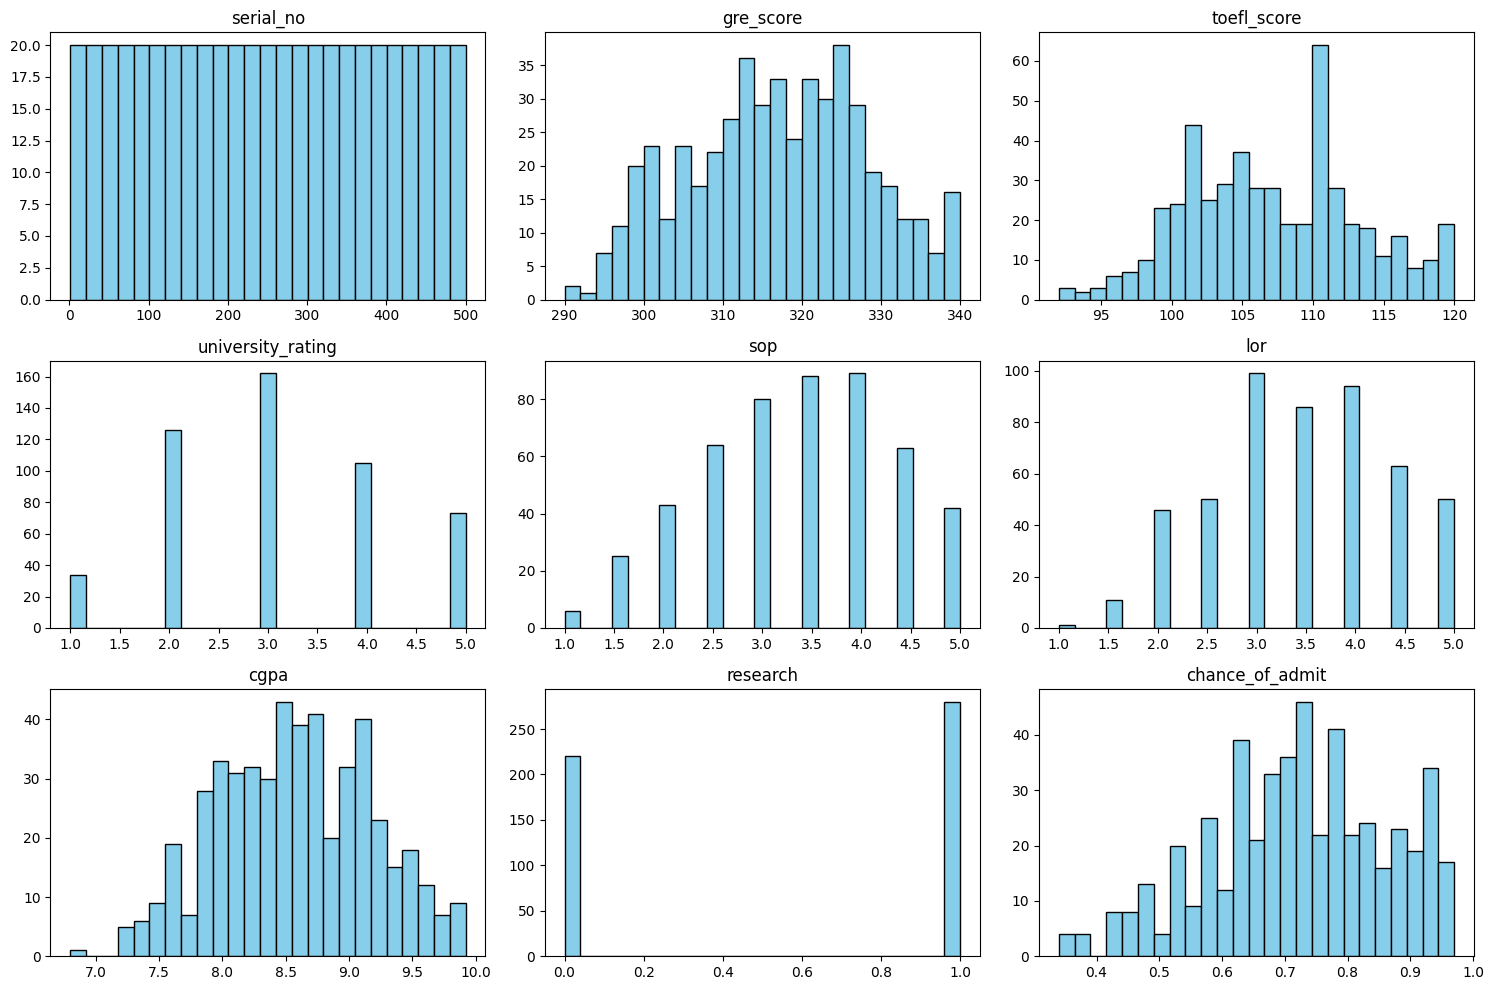

In [6]:
admissions.hist(
    bins=25,
    edgecolor='black',
    figsize=(15, 10),
    layout=(3,3),
    grid=False,
    color='skyblue'
)

plt.tight_layout()
plt.show()

The distribution of the chance to admit is left skewed which could mean that most applicants are strong.

**5. Chance of Admission seems to vary quite a bit from student to student. How much of this depends on their research experience? Find the average Chance of Admission for the different levels of Research. (this can be done using a `groupby`) - add a sentence interpreting the results.**

In [7]:
research_avg = admissions.groupby("research")["chance_of_admit"].mean().round(3)

print("Average Chance of Admission by Research Experience:")
print(research_avg)

Average Chance of Admission by Research Experience:
research
0    0.635
1    0.790
Name: chance_of_admit, dtype: float64


Students with research experience have a substantially higher average chance of admission (0.790) compared to those without research (0.635), which means that research experience plays an important role in admission outcomes.

**6. Another way to look at the relationship between two variables is through scatter plots. Plot a scatter plot between TOEFL Score and Chance of Admission.  Use an `alpha` value less than 0.5 in order to see where there is overplotting.   Make sure to label the axes. Comment:  How would you describe this relationship?**

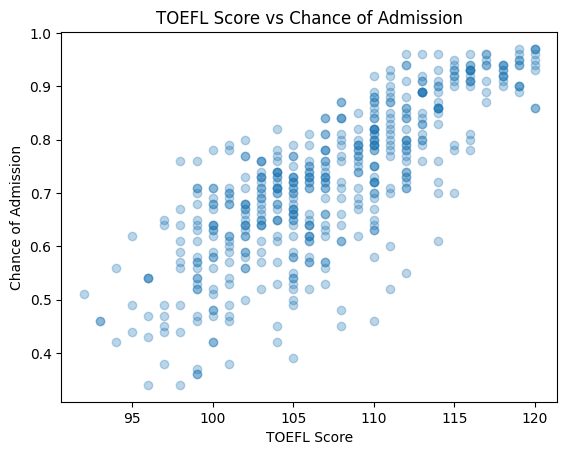

In [12]:
plt.scatter(
    admissions["toefl_score"],
    admissions["chance_of_admit"],
    alpha=0.3  # less than 0.5 to reduce overplotting
)

plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admission")
plt.title("TOEFL Score vs Chance of Admission")

plt.show()

The scatter plot above shows that there is a strong postive linear relationship betweeh toefl scores and the chance of admissions. Students with higher toefl scores have higher chances of getting admitted.

**7. Boxplots are useful to look at the relationship between a categorical variable and a numeric variable. Plot a boxplot of chance of Admission grouped by "University Rating". (check out `.boxplot()` in the *seaborn* library).  Comment on any relationship you see.**

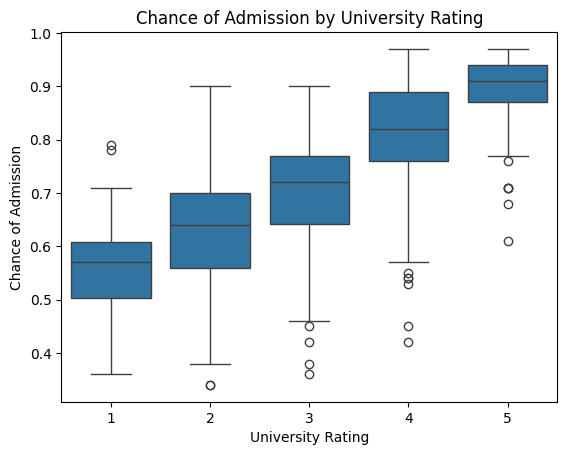

In [13]:
sns.boxplot(
    x="university_rating",
    y="chance_of_admit",
    data=admissions
)

plt.xlabel("University Rating")
plt.ylabel("Chance of Admission")
plt.title("Chance of Admission by University Rating")

plt.show()


The boxplot shows a positive relationship between university rating and chance of admission. As the university rating increases, the median chance of admission also increases but some outliers indicate that university rating is not the only factor influencing admission decisions.

**8. The boxplots above show some potential outliers.  In particular the box for 'University Rating' = 5 has some cases with lower Chance of Admission than the other applications with Rating = 5. Can you identify which case (by serial number) has the lowest Chance of admission but comes from a university with Rating = 5? Why do you think this student is given a smaller chance of admission?**


In [19]:
rating5 = admissions[admissions["university_rating"] == 5]

# Find the row with the lowest chance_of_admit
lowest_case = rating5.loc[rating5["chance_of_admit"].idxmin()]

lowest_case

,110
gre_score,305.00
toefl_score,108.00
university_rating,5.00
sop,3.00
lor,3.00
cgpa,8.48
research,0.00
chance_of_admit,0.61


The student with the lowest chance of admission among those from a university rated 5 is Serial No. 111, with a chance of admission of 0.61. Although the student comes from a highly rated university, their GRE score (305), moderate TOEFL score (108), average SOP and LOR ratings (3), and lack of research experience likely lowered their overall admission probability. This shows that university rating alone is not enough to guarantee a high chance of admission.

**9. Drop the column for Serial Number. It is not useful for the following summarization and modelling tasks.**

In [22]:
admissions = admissions.drop(columns=["serial_no"])

admissions.head()


,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**10. Display the correlations between all pairs of features using the heatmap function in seaborn. Round values to two decimal places. (use appropriate color palette and max/min values - See our `T3_DataViz.ipynb` Module for hints ).**

<Axes: >

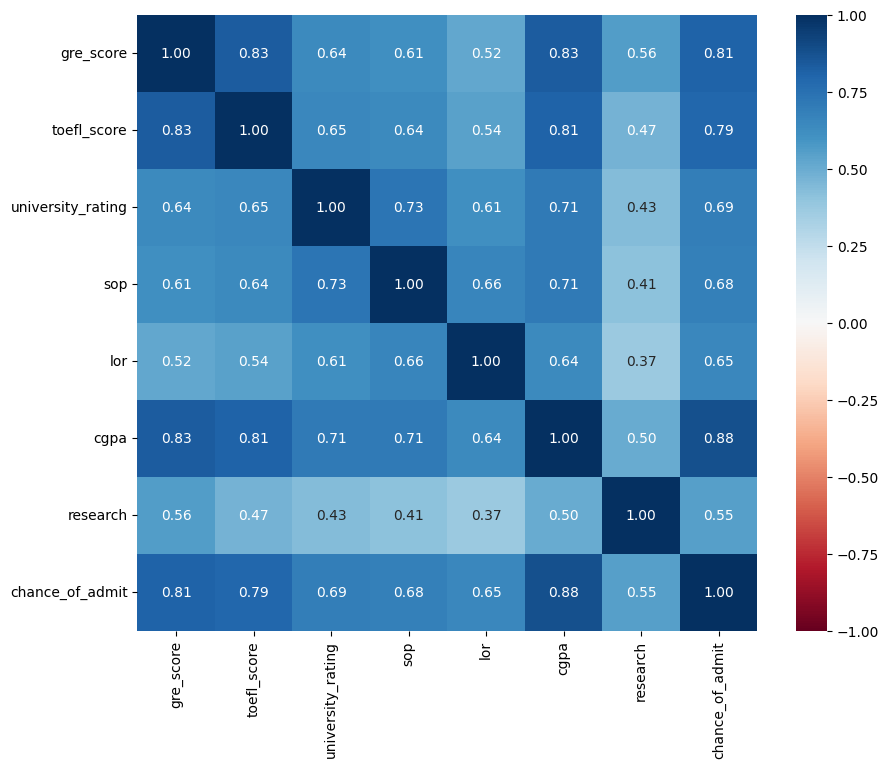

In [23]:
# Restricting to numeric columns (good practice)
numeric_df = admissions.select_dtypes(include=["number"])

# Compute correlation matrix and round
corr = numeric_df.corr().round(2)

# Plot heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr,
    annot=True,          # show numbers
    fmt=".2f",           # round to 2 decimals
    cmap="RdBu",         # red-blue color scheme
    center=0,            # center at 0
    vmin=-1, vmax=1      # full correlation range
)

**11. Based on this heatmap, which feature has the highest correlation with our target?**

The feature with the highest correlation with chance_of_admit is CGPA (0.88). This indicates that undergraduate GPA is the strongest predictor of admission probability among the available features.

**12. Build a linear regression model (using `LinearRegression` from `sklearn.linear_model`) to predict the Chance of Admission using the available features. Use an 80/20 training/test split.  Generate predictions and plot a scatterplot of the predicted values against the actual values using the test set.  Report the Root Mean Squared Error (RMSE) for your predictions (don't forget to round!) and comment with an interpretion of the meaning of the RMSE.**

Root Mean Squared Error (RMSE): 0.06


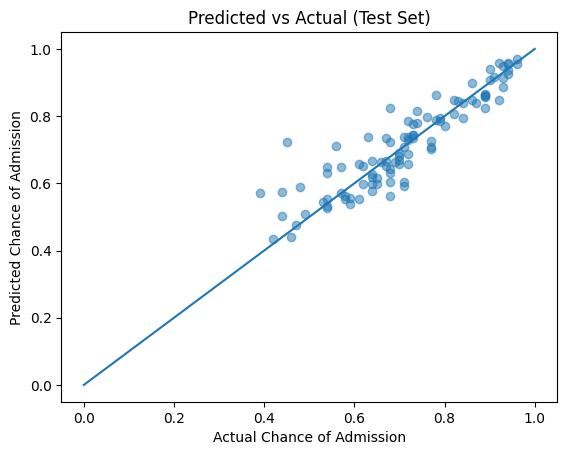

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Defining X (features) and y (target)
X = admissions.drop(columns=["chance_of_admit"])
y = admissions["chance_of_admit"]

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initializing and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_rounded = round(rmse, 2)

print(f"Root Mean Squared Error (RMSE): {rmse_rounded}")


plt.scatter(y_test, y_pred, alpha=0.5)

plt.xlabel("Actual Chance of Admission")
plt.ylabel("Predicted Chance of Admission")
plt.title("Predicted vs Actual (Test Set)")

# Reference line (perfect predictions)
plt.plot([0,1], [0,1])

plt.show()

An RMSE of 0.06 indicates that the model’s predictions are  within about 6 percentage points of the true admission probability, suggesting good predictive performance for a simple linear regression model.

**13. Describe how the admissions team might take action to use the results of this model to aid in the admissions process.  Specifically what actions could they take, and what might the impact be of an effective model.  Also, discuss any ethical concerns you may see with using this data for this purpose.**

The admissions team could use the model to prioritize applications by identifying strong candidates from others. This could reduce review time, improve efficiency, and help with planning resources such as housing.
However, there are ethical concerns. Since the model is based on historical data, it may reflect existing biases such as access to research or high-ranked universities.